## HW 1-10: Methods of Integration

In [17]:
import numpy as np
import pandas as pd

# Analytical solution at t=1
exact_solution = np.exp(1)

# Numerical Integration Techniques
def euler_step(deriv_func, initial_val, time_points, step_size):
    current = initial_val
    for current_time in time_points[:-1]:
        current += step_size * deriv_func(current_time, current)
    return current

def midpoint_step(deriv_func, initial_val, time_points, step_size):
    current = initial_val
    for current_time in time_points[:-1]:
        temp = current + (step_size / 2) * deriv_func(current_time, current)
        current += step_size * deriv_func(current_time + step_size / 2, temp)
    return current

def runge_kutta_step(deriv_func, initial_val, time_points, step_size):
    current = initial_val
    for current_time in time_points[:-1]:
        k1 = deriv_func(current_time, current)
        k2 = deriv_func(current_time + step_size / 2, current + (step_size * k1) / 2)
        k3 = deriv_func(current_time + step_size / 2, current + (step_size * k2) / 2)
        k4 = deriv_func(current_time + step_size, current + step_size * k3)
        current += (step_size / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return current

# Differential equation dx/dt = x
def derivative(t, x):
    return x

# Initial condition
initial_x = 1

# Discretization points: from 2^10 to 2^20
num_steps_list = [2**k for k in range(10, 21)]
simulation_results = []

# Perform simulations for each N
for num_steps in num_steps_list:
    delta_t = 1.0 / num_steps
    times = np.linspace(0, 1, num_steps + 1)
    
    # Compute numerical solutions
    euler_val = euler_step(derivative, initial_x, times, delta_t)
    midpoint_val = midpoint_step(derivative, initial_x, times, delta_t)
    rk_val = runge_kutta_step(derivative, initial_x, times, delta_t)
    
    # Calculate absolute errors
    error_euler = abs(euler_val - exact_solution)
    error_midpoint = abs(midpoint_val - exact_solution)
    error_rk = abs(rk_val - exact_solution)
    
    # Calculate percentage errors
    percent_error_euler = (error_euler / exact_solution) * 100
    percent_error_midpoint = (error_midpoint / exact_solution) * 100
    percent_error_rk = (error_rk / exact_solution) * 100
    
    # Append results
    simulation_results.append([
        num_steps,
        error_euler,
        error_midpoint,
        error_rk,
        percent_error_euler,
        percent_error_midpoint,
        percent_error_rk
    ])

# Organize results into a DataFrame
result_columns = [
    "Steps (N)",
    "Euler Absolute Error",
    "Midpoint Absolute Error",
    "Runge-Kutta Absolute Error",
    "Euler Relative Error",
    "Midpoint Relative Error",
    "Runge-Kutta Relative Error"
]
results_df = pd.DataFrame(simulation_results, columns=result_columns)

# Rename index to "N"
results_df.index.name = "Steps (N)"

# Display the results
display(results_df)

,Steps (N),Euler Absolute Error,Midpoint Absolute Error,Runge-Kutta Absolute Error,Euler Relative Error,Midpoint Relative Error,Runge-Kutta Relative Error
0,1024,0.001326,4.317429e-07,1.953993e-14,0.048784,1.588293e-05,7.188337e-13
1,2048,0.000663,1.079753e-07,3.552714e-15,0.024403,3.972188e-06,1.306970e-13
2,4096,0.000332,2.699876e-08,8.437695e-15,0.012204,9.932289e-07,3.104055e-13
3,8192,0.000166,6.750315e-09,2.131628e-14,0.006103,2.483302e-07,7.841822e-13
4,16384,0.000083,1.687626e-09,2.220446e-15,0.003052,6.208431e-08,8.168565e-14
5,32768,0.000041,4.219323e-10,1.509903e-14,0.001526,1.552202e-08,5.554624e-13
6,65536,0.000021,1.054659e-10,5.462297e-14,0.000763,3.879872e-09,2.009467e-12
7,131072,0.000010,2.643086e-11,5.595524e-14,0.000381,9.723369e-10,2.058478e-12
8,262144,0.000005,6.560086e-12,2.886580e-14,0.000191,2.413321e-10,1.061913e-12
9,524288,0.000003,1.751044e-12,1.332268e-13,0.000095,6.441730e-11,4.901139e-12


## Homework 2-8: Simulating Lotka–Volterra

/var/folders/hd/zbd8pxds5rb7s_5m29d5mvcm0000gn/T/ipykernel_64333/1077994115.py:12: RuntimeWarning: overflow encountered in scalar multiply
  return x * (k - a * y)
/var/folders/hd/zbd8pxds5rb7s_5m29d5mvcm0000gn/T/ipykernel_64333/1077994115.py:15: RuntimeWarning: overflow encountered in scalar multiply
  return -y * (l - b * x)
/var/folders/hd/zbd8pxds5rb7s_5m29d5mvcm0000gn/T/ipykernel_64333/1077994115.py:66: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


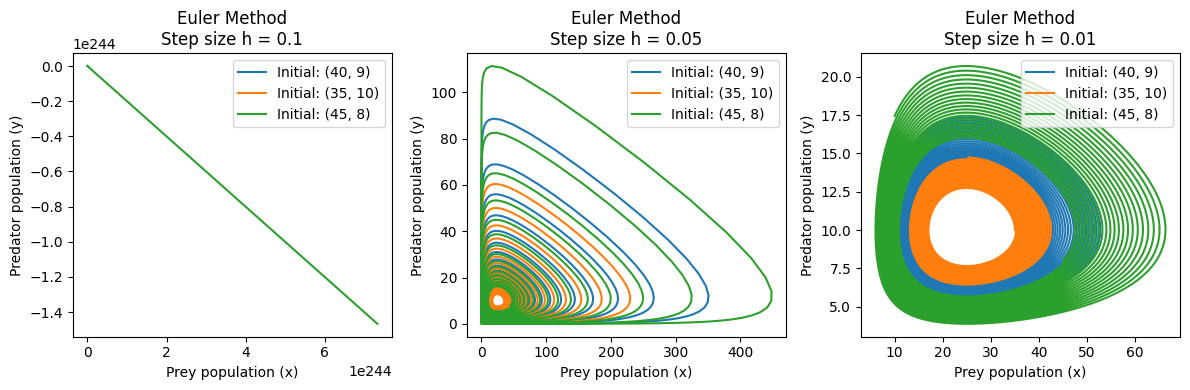

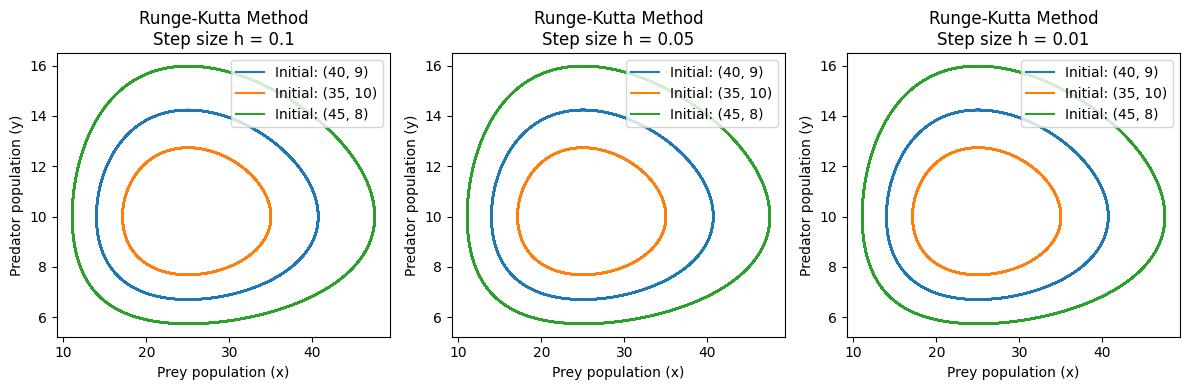

In [9]:


import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 1.0
l = 0.5
a = 0.1
b = 0.02

# Lotka-Volterra equations
def f_x(x, y):
    return x * (k - a * y)

def f_y(x, y):
    return -y * (l - b * x)

# Euler's Method
def euler_method(x0, y0, h, steps):
    x = np.zeros(steps)
    y = np.zeros(steps)
    x[0], y[0] = x0, y0
    for i in range(1, steps):
        x[i] = x[i-1] + h * f_x(x[i-1], y[i-1])
        y[i] = y[i-1] + h * f_y(x[i-1], y[i-1])
    return x, y

# Runge-Kutta 4th Order Method
def runge_kutta_method(x0, y0, h, steps):
    x = np.zeros(steps)
    y = np.zeros(steps)
    x[0], y[0] = x0, y0
    for i in range(1, steps):
        k1x = h * f_x(x[i-1], y[i-1])
        k1y = h * f_y(x[i-1], y[i-1])

        k2x = h * f_x(x[i-1] + 0.5 * k1x, y[i-1] + 0.5 * k1y)
        k2y = h * f_y(x[i-1] + 0.5 * k1x, y[i-1] + 0.5 * k1y)

        k3x = h * f_x(x[i-1] + 0.5 * k2x, y[i-1] + 0.5 * k2y)
        k3y = h * f_y(x[i-1] + 0.5 * k2x, y[i-1] + 0.5 * k2y)

        k4x = h * f_x(x[i-1] + k3x, y[i-1] + k3y)
        k4y = h * f_y(x[i-1] + k3x, y[i-1] + k3y)

        x[i] = x[i-1] + (k1x + 2*k2x + 2*k3x + k4x) / 6
        y[i] = y[i-1] + (k1y + 2*k2y + 2*k3y + k4y) / 6
    return x, y

# Simulation parameters
h_values = [0.1, 0.05, 0.01]
methods = {'Euler': euler_method, 'Runge-Kutta': runge_kutta_method}
initial_conditions = [(40, 9), (35, 10), (45, 8)]

for method_name, method in methods.items():
    plt.figure(figsize=(12, 4))
    for idx, h in enumerate(h_values):
        plt.subplot(1, len(h_values), idx+1)
        for x0, y0 in initial_conditions:
            steps = int(200 / h)
            x, y = method(x0, y0, h, steps)
            plt.plot(x, y, label=f'Initial: ({x0}, {y0})')
        plt.title(f'{method_name} Method\nStep size h = {h}')
        plt.xlabel('Prey population (x)')
        plt.ylabel('Predator population (y)')
        plt.legend()
        plt.tight_layout()
    plt.show()


## Homework 3-9: Simulating van der Pol equation

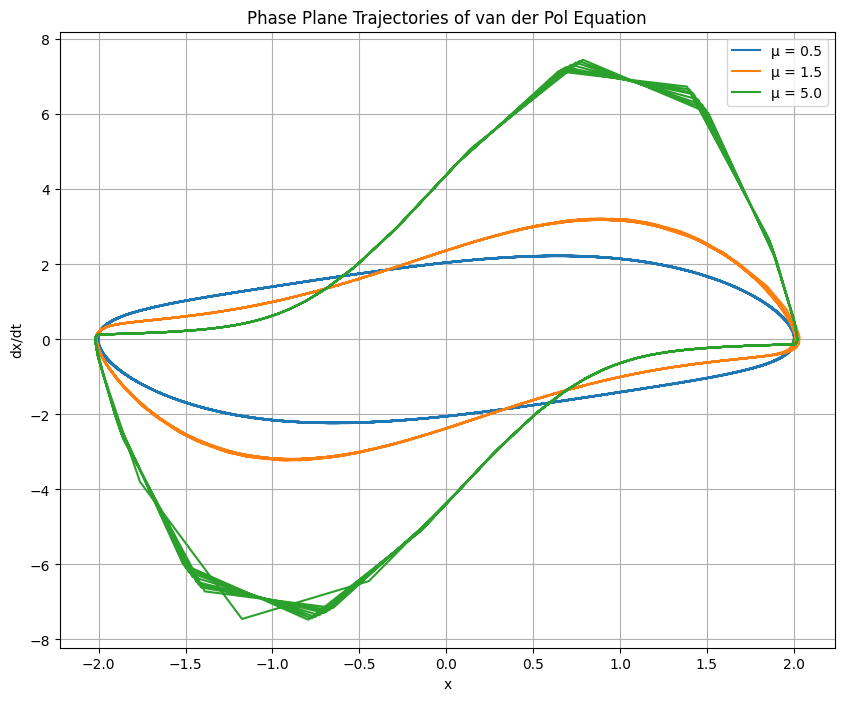

In [10]:
from scipy.integrate import solve_ivp

# Define the van der Pol system
def van_der_pol(t, state, mu):
    x, y = state
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return [dxdt, dydt]

# Parameters and initial conditions
initial_conditions = [2.0, 0.0]  # Initial values for x and dx/dt
t_span = (0, 100)  # Time interval
t_eval = np.linspace(*t_span, 1000)  # Time points for evaluation
mu_values = [0.5, 1.5, 5.0]  # Different values of μ

# Solve and plot phase trajectories
plt.figure(figsize=(10, 8))

for mu in mu_values:
    solution = solve_ivp(
        van_der_pol, t_span, initial_conditions, args=(mu,), t_eval=t_eval, method='RK45'
    )
    x, y = solution.y
    plt.plot(x, y, label=f"μ = {mu}")

plt.title("Phase Plane Trajectories of van der Pol Equation")
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.legend()
plt.grid()
plt.show()

## HW 7-8: Simulating the Lorenz system

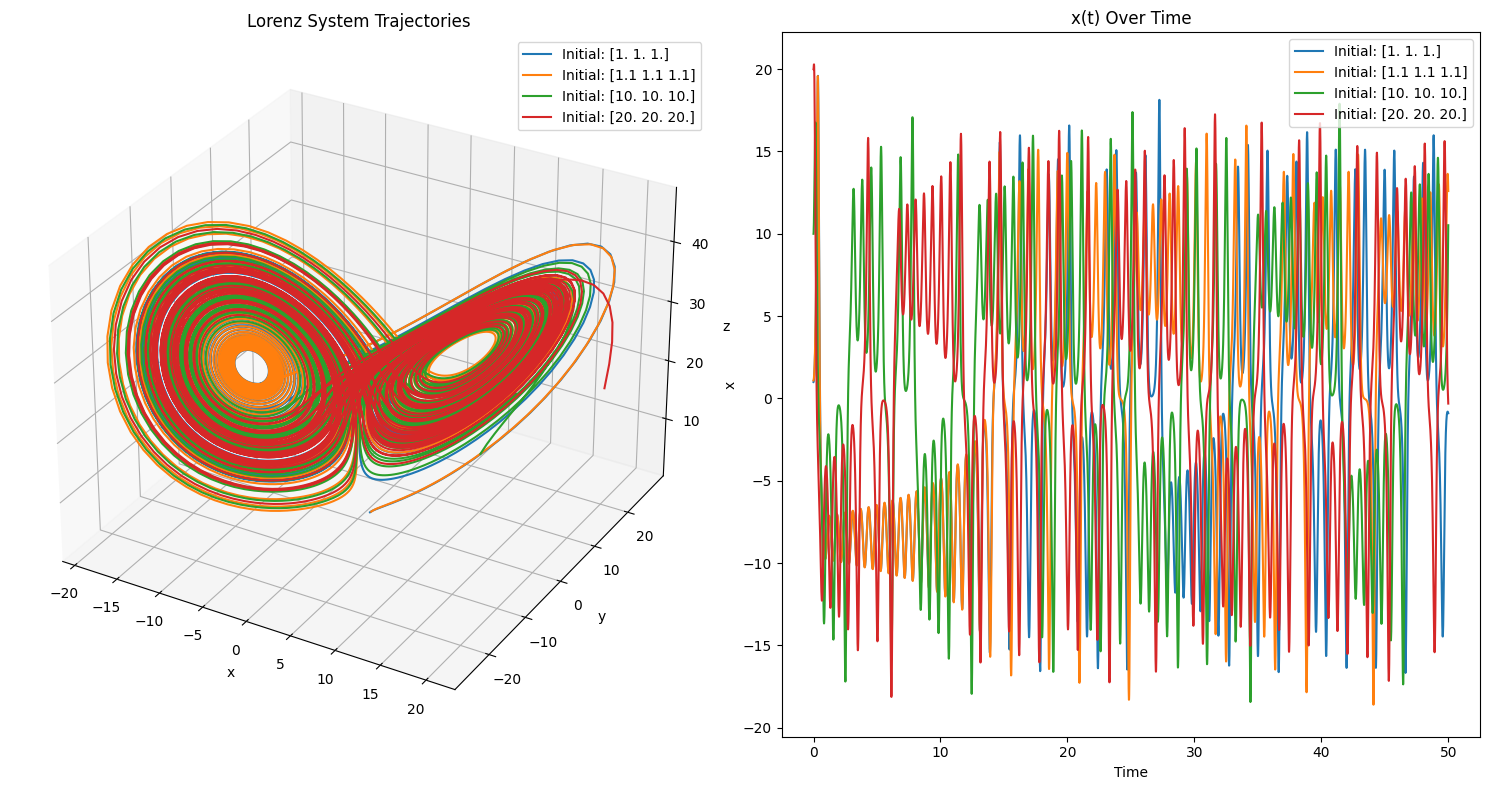

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

# Define the Lorenz system
def lorenz_system(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10
beta = 8 / 3
rho = 28

# Time settings
t_span = (0, 50)  # Time interval
t_eval = np.linspace(*t_span, 5000)  # Time points for evaluation

# Initial conditions
initial_conditions = [
    [1, 1, 1],         # Small values
    [1.1, 1.1, 1.1],   # Slightly perturbed
    [10, 10, 10],      # Moderate values
    [20, 20, 20],      # Larger values
]

# Solve the system for each initial condition
trajectories = []
for initial in initial_conditions:
    solution = solve_ivp(
        lorenz_system, t_span, initial, args=(sigma, rho, beta), t_eval=t_eval, method='RK45'
    )
    trajectories.append(solution)

# Plot 3D trajectories
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(121, projection='3d')
for sol in trajectories:
    x, y, z = sol.y
    ax.plot(x, y, z, label=f"Initial: {sol.y[:, 0]}")
ax.set_title("Lorenz System Trajectories")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()

# Plot x(t) over time
plt.subplot(122)
for sol in trajectories:
    plt.plot(sol.t, sol.y[0], label=f"Initial: {sol.y[:, 0]}")
plt.title("x(t) Over Time")
plt.xlabel("Time")
plt.ylabel("x")
plt.legend()

plt.tight_layout()
plt.show()